In [1]:
import pandas as pd
import sklearn
from sklearn import svm

In [2]:
SmileData = pd.read_csv("FinalClearData.csv")

In [3]:
SmileData

,Unnamed: 0,Unnamed: 0.1,SMILES,LABELS,Isit
0,0,0,OC(=O)c1cc(ccc1O)N=Nc1ccc(cc1)S(=O)(=O)Nc1ccccn1,0,0
1,1,1,COC1(NC(=O)C(C(O)=O)c2ccc(O)cc2)C2OCC(CSc3nnnn...,0,0
2,2,2,Oc1c(I)cc(Cl)c2cccnc12,0,0
3,3,3,CCNC(NC#N)=NCCSCc1ncccc1Br,0,0
4,4,4,CN1CC[C@@]23[C@H]4Oc5c2c(C[C@@H]1[C@@H]3C=C[C@...,0,0
...,...,...,...,...,...
3006,3324,3331,OC(=O)c1cccnc1,0,0
3007,3325,3332,[O-][S+](CCC1C(=O)N(N(C1=O)c1ccccc1)c1ccccc1)c...,0,0
3008,3326,3333,Clc1ccc2N=C3NC(=O)CN3Cc2c1Cl,0,0
3009,3327,3334,Oc1ccc2c(Oc3cc(O)ccc3C22OC(=O)c3ccccc23)c1,0,0


In [4]:
Fingerprint = pd.read_csv("Interaction.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Interaction.csv'

In [5]:
Fingerprint

,Unnamed: 0,0,1,2,3,4,5,6,7,8
0,0,1,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,1
2,2,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0
4,4,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
3006,3006,0,0,0,0,0,0,0,0,1
3007,3007,1,0,0,0,0,0,0,0,1
3008,3008,0,1,0,0,0,0,0,0,1
3009,3009,0,0,0,0,0,0,0,0,1


#### Training with Interaction fingerprint only

In [10]:
df = pd.concat([Fingerprint,SmileData.LABELS],axis=1).drop("Unnamed: 0",axis=1)

In [13]:
df

,0,1,2,3,4,5,6,7,8,LABELS
0,1,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
3006,0,0,0,0,0,0,0,0,1,0
3007,1,0,0,0,0,0,0,0,1,0
3008,0,1,0,0,0,0,0,0,1,0
3009,0,0,0,0,0,0,0,0,1,0


#### Splitting the data

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(df.drop("LABELS",axis=1), df["LABELS"], test_size=0.33, random_state=42,shuffle=True,stratify=df.LABELS)

### Training with dummy classifier only

In [46]:
from sklearn.dummy import DummyClassifier

In [55]:
dummy_clf = DummyClassifier(strategy="uniform",random_state=444)

In [56]:
dummy_clf.fit(X_train,y_train)

DummyClassifier(random_state=444, strategy='uniform')

In [57]:
y_pred = dummy_clf.predict(X_train,)

In [58]:
accuracy_score(y_train,y_pred)### 

0.496777392166584

### With SVM

In [65]:
### SVM classifier with default parameters
clf = svm.SVC()

In [66]:
clf.fit(X_train, y_train)

SVC()

In [67]:
y_pred = clf.predict(X_train)

In [68]:
accuracy_score(y_train,y_pred) ## Gives only accuracy of 0.62

0.6246901338621715

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

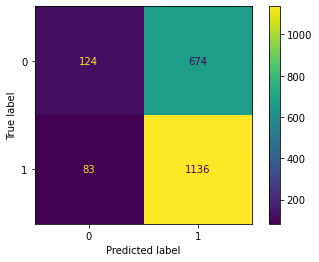

In [70]:
ConfusionMatrixDisplay(confusion_matrix(y_train,y_pred)).plot()
plt.show()

In [71]:
y_pred2 = clf.predict(X_test)

In [73]:
## Only on fingerprint data
accuracy_score(y_test,y_pred2) ## no overfitting

0.613682092555332

#### With MorganFingerprint

In [80]:
import rdkit
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect

In [81]:
def fp_gen(smi):
    return GetMorganFingerprintAsBitVect(MolFromSmiles(smi),2,nBits=1024)

In [82]:
SmileData["fingerprint"] =SmileData.SMILES.apply(fp_gen)

In [83]:
fp_array = []
for i in SmileData.fingerprint:
    fp_array.append(list(i))

In [84]:
fp = pd.DataFrame(fp_array)

In [87]:
final_fp = pd.concat([fp,Fingerprint,SmileData.LABELS],axis=1)

In [96]:
final_fp.columns = [i for i in range(1035)]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(final_fp.drop(1034,axis=1), final_fp[1034], test_size=0.33, random_state=42,shuffle=True,stratify=final_fp[1034])

In [99]:
clf = svm.SVC()

In [100]:
clf.fit(X_train, y_train.values)

SVC()

In [101]:
y_pred = clf.predict(X_train.values)

In [102]:
accuracy_score(y_train,y_pred)

0.7565691621219633

### Without Interaction Fingerprint only Morgan

In [110]:
final_fp = pd.concat([fp,SmileData.LABELS],axis=1)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(final_fp.drop("LABELS",axis=1), final_fp["LABELS"], test_size=0.33, random_state=42,shuffle=True,stratify=final_fp.LABELS)

In [112]:
clf = svm.SVC()

In [113]:
clf.fit(X_train, y_train)

SVC()

In [114]:
y_pred = clf.predict(X_train)

In [115]:
accuracy_score(y_train,y_pred) ### great score

0.9300941993058999

In [109]:
y_pred2 = clf.predict(X_test)

In [95]:
accuracy_score(y_test,y_pred2) 

0.7424547283702213

### With Descriptors

In [139]:
from rdkit import ML
import rdkit.Chem.Descriptors as D
import rdkit.ML.Descriptors.MoleculeDescriptors as rml

In [140]:
dir(D)

['AUTOCORR2D_1',
 'AUTOCORR2D_10',
 'AUTOCORR2D_100',
 'AUTOCORR2D_101',
 'AUTOCORR2D_102',
 'AUTOCORR2D_103',
 'AUTOCORR2D_104',
 'AUTOCORR2D_105',
 'AUTOCORR2D_106',
 'AUTOCORR2D_107',
 'AUTOCORR2D_108',
 'AUTOCORR2D_109',
 'AUTOCORR2D_11',
 'AUTOCORR2D_110',
 'AUTOCORR2D_111',
 'AUTOCORR2D_112',
 'AUTOCORR2D_113',
 'AUTOCORR2D_114',
 'AUTOCORR2D_115',
 'AUTOCORR2D_116',
 'AUTOCORR2D_117',
 'AUTOCORR2D_118',
 'AUTOCORR2D_119',
 'AUTOCORR2D_12',
 'AUTOCORR2D_120',
 'AUTOCORR2D_121',
 'AUTOCORR2D_122',
 'AUTOCORR2D_123',
 'AUTOCORR2D_124',
 'AUTOCORR2D_125',
 'AUTOCORR2D_126',
 'AUTOCORR2D_127',
 'AUTOCORR2D_128',
 'AUTOCORR2D_129',
 'AUTOCORR2D_13',
 'AUTOCORR2D_130',
 'AUTOCORR2D_131',
 'AUTOCORR2D_132',
 'AUTOCORR2D_133',
 'AUTOCORR2D_134',
 'AUTOCORR2D_135',
 'AUTOCORR2D_136',
 'AUTOCORR2D_137',
 'AUTOCORR2D_138',
 'AUTOCORR2D_139',
 'AUTOCORR2D_14',
 'AUTOCORR2D_140',
 'AUTOCORR2D_141',
 'AUTOCORR2D_142',
 'AUTOCORR2D_143',
 'AUTOCORR2D_144',
 'AUTOCORR2D_145',
 'AUTOCORR2D_146',


In [148]:
l = ["ExactMolWt","MolLogP","MolMR","TPSA","NumHAcceptors","NumHDonors","NumAromaticRings","NumRotatableBonds",
    ]
s = rml.MolecularDescriptorCalculator(l)

In [149]:
def descripCalc(smi):
    mol = MolFromSmiles(smi)
    return s.CalcDescriptors(mol)

In [150]:
SmileData["Descriptors"] =  SmileData.SMILES.apply(descripCalc)

In [151]:
desArray = []
for i in SmileData.Descriptors:
    desArray.append(list(i))

In [152]:
scalarData = pd.DataFrame(desArray)

In [153]:
scalarData

,0,1,2,3,4,5,6,7
0,398.068491,3.70160,100.7296,141.31,7,3,3,6
1,520.101247,-1.12770,117.1361,206.30,12,4,2,9
2,304.910439,3.19840,61.1348,33.12,2,1,2,0
3,341.030979,2.11348,82.8264,73.10,4,2,1,6
4,461.168581,-1.23650,110.8570,149.15,9,5,1,3
...,...,...,...,...,...,...,...,...
3006,123.032028,0.77980,31.1963,50.19,2,1,1,1
3007,404.119463,3.79550,113.6804,63.68,3,0,3,6
3008,254.996617,1.92630,62.1097,44.70,3,1,1,0
3009,332.068473,3.66580,88.0271,75.99,5,2,3,0


In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [155]:
scaledData = scaler.fit_transform(scalarData[[0,1,2,3]])

In [156]:
pd.DataFrame(scaledData)

,0,1,2,3
0,0.336306,0.552562,0.212232,1.191157
1,1.216635,-1.652325,0.667530,2.377681
2,-0.335725,0.322819,-0.886567,-0.784071
3,-0.075156,-0.172517,-0.284601,-0.054155
4,0.791502,-1.701999,0.493278,1.334292
...,...,...,...,...
3006,-1.647774,-0.781428,-1.717392,-0.472424
3007,0.379957,0.595433,0.571631,-0.226137
3008,-0.695798,-0.257977,-0.859512,-0.572655
3009,-0.139811,0.536217,-0.140276,-0.001393


In [158]:
scalarData[[0,1,2,3]] = pd.DataFrame(scaledData)

In [160]:
scalarData

,0,1,2,3,4,5,6,7
0,0.336306,0.552562,0.212232,1.191157,7,3,3,6
1,1.216635,-1.652325,0.667530,2.377681,12,4,2,9
2,-0.335725,0.322819,-0.886567,-0.784071,2,1,2,0
3,-0.075156,-0.172517,-0.284601,-0.054155,4,2,1,6
4,0.791502,-1.701999,0.493278,1.334292,9,5,1,3
...,...,...,...,...,...,...,...,...
3006,-1.647774,-0.781428,-1.717392,-0.472424,2,1,1,1
3007,0.379957,0.595433,0.571631,-0.226137,3,0,3,6
3008,-0.695798,-0.257977,-0.859512,-0.572655,3,1,1,0
3009,-0.139811,0.536217,-0.140276,-0.001393,5,2,3,0


In [161]:
final_df = pd.concat([scalarData,SmileData.LABELS],axis=1)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop("LABELS",axis=1), final_df["LABELS"], test_size=0.33, random_state=42,shuffle=True,stratify=final_df.LABELS)

In [164]:
clf = svm.SVC()
clf.fit(X_train, y_train.values)

SVC()

In [165]:
y_pred = clf.predict(X_train)

In [166]:
accuracy_score(y_train,y_pred) ### great score

0.7337630143777888

#### With Descriptors and IFP

In [176]:
final_df = pd.concat([scalarData,Fingerprint,SmileData.LABELS],axis=1).drop("Unnamed: 0",axis=1)

In [177]:
final_df

,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,7,8,LABELS
0,0.336306,0.552562,0.212232,1.191157,7,3,3,6,1,0,1,0,0,0,0,0,1,0
1,1.216635,-1.652325,0.667530,2.377681,12,4,2,9,0,0,0,0,0,0,0,0,1,0
2,-0.335725,0.322819,-0.886567,-0.784071,2,1,2,0,0,0,0,0,0,0,0,0,0,0
3,-0.075156,-0.172517,-0.284601,-0.054155,4,2,1,6,0,0,0,0,0,0,0,0,0,0
4,0.791502,-1.701999,0.493278,1.334292,9,5,1,3,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,-1.647774,-0.781428,-1.717392,-0.472424,2,1,1,1,0,0,0,0,0,0,0,0,1,0
3007,0.379957,0.595433,0.571631,-0.226137,3,0,3,6,1,0,0,0,0,0,0,0,1,0
3008,-0.695798,-0.257977,-0.859512,-0.572655,3,1,1,0,0,1,0,0,0,0,0,0,1,0
3009,-0.139811,0.536217,-0.140276,-0.001393,5,2,3,0,0,0,0,0,0,0,0,0,1,0


In [178]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop("LABELS",axis=1), final_df["LABELS"], test_size=0.33, random_state=42,shuffle=True,stratify=final_df.LABELS)

In [179]:
clf = svm.SVC()
clf.fit(X_train, y_train.values)

/home/saurav/anaconda3/envs/prolif/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


SVC()

In [180]:
y_pred = clf.predict(X_train)

/home/saurav/anaconda3/envs/prolif/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [181]:
accuracy_score(y_train,y_pred) ### great score

0.7332672285572632

#### Using RDkit pharmacophore fingerprint

In [182]:
from rdkit import Chem,DataStructs, RDConfig
from rdkit.Chem import AllChem
from rdkit.Chem.Pharm2D import Gobbi_Pharm2D, Generate
import rdkit.Chem.Pharm2D

In [213]:
def PharmaPrint(smi):
    try:
        mol = Chem.MolFromSmiles(smi,)
        mol = Chem.AddHs(mol)
        AllChem.EmbedMolecule(mol ) #gen 3d
        factory = Gobbi_Pharm2D.factory
        fp = Generate.Gen2DFingerprint(mol,factory,dMat = Chem.Get3DDistanceMatrix(mol ))

        return fp
    except:
        return ""

In [214]:
SmileData["PharmacophorePrint"] = SmileData.SMILES.apply(PharmaPrint)

[15:58:18] UFFTYPER: Unrecognized charge state for atom: 11
[15:58:28] UFFTYPER: Unrecognized charge state for atom: 1
[15:58:28] UFFTYPER: Unrecognized charge state for atom: 13
[15:58:46] UFFTYPER: Unrecognized atom type: S_5+4 (2)
[15:58:47] UFFTYPER: Unrecognized charge state for atom: 23
[15:58:49] UFFTYPER: Unrecognized atom type: S_5+4 (2)
[15:59:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:59:25] UFFTYPER: Unrecognized charge state for atom: 1
[16:00:21] UFFTYPER: Unrecognized charge state for atom: 23
[16:00:40] UFFTYPER: Unrecognized charge state for atom: 11
[16:00:43] UFFTYPER: Unrecognized charge state for atom: 1
[16:00:49] UFFTYPER: Unrecognized charge state for atom: 4
[16:02:03] UFFTYPER: Unrecognized charge state for atom: 1
[16:02:36] UFFTYPER: Unrecognized charge state for atom: 14
[16:03:03] UFFTYPER: Unrecognized charge state for atom: 21
[16:03:10] UFFTYPER: Warning: hybridization set to SP3 for atom 11
[16:03:10] UFFTYPER: Unrecognized charge state for at

In [279]:
SmileData.shape

(3011, 8)

In [297]:
New_data = SmileData.drop(SmileData[SmileData.PharmacophorePrint == ""].index)

In [298]:
New_data.shape

(2996, 8)

In [299]:
Pharmarray = []
for i in New_data.PharmacophorePrint:
    Pharmarray.append(list(i))    

In [300]:
df_2 = pd.DataFrame(Pharmarray)

In [301]:
df_2

,0,1,2,3,4,5,6,7,8,9,...,39962,39963,39964,39965,39966,39967,39968,39969,39970,39971
0,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [302]:
New_data = New_data.drop(["Unnamed: 0.1","Unnamed: 0"],axis=1).reset_index(drop=True)

In [303]:
New_data

,SMILES,LABELS,Isit,fingerprint,Descriptors,PharmacophorePrint
0,OC(=O)c1cc(ccc1O)N=Nc1ccc(cc1)S(=O)(=O)Nc1ccccn1,0,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","(398.068490548, 3.7016000000000018, 100.729600...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, ..."
1,COC1(NC(=O)C(C(O)=O)c2ccc(O)cc2)C2OCC(CSc3nnnn...,0,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","(520.1012472200001, -1.1276999999999993, 117.1...","[0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, ..."
2,Oc1c(I)cc(Cl)c2cccnc12,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","(304.9104394600001, 3.1984000000000004, 61.134...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CCNC(NC#N)=NCCSCc1ncccc1Br,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","(341.030978612, 2.11348, 82.82640000000004, 73...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CN1CC[C@@]23[C@H]4Oc5c2c(C[C@@H]1[C@@H]3C=C[C@...,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","(461.16858144399987, -1.2364999999999988, 110....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, ..."
...,...,...,...,...,...,...
2991,OC(=O)c1cccnc1,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","(123.0320284, 0.7797999999999999, 31.196299999...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, ..."
2992,[O-][S+](CCC1C(=O)N(N(C1=O)c1ccccc1)c1ccccc1)c...,0,0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","(404.1194635, 3.7955000000000023, 113.6804, 63...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2993,Clc1ccc2N=C3NC(=O)CN3Cc2c1Cl,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","(254.996617204, 1.9263, 62.10970000000001, 44....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2994,Oc1ccc2c(Oc3cc(O)ccc3C22OC(=O)c3ccccc23)c1,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","(332.06847348400004, 3.6658000000000026, 88.02...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [304]:
New_data.LABELS.isna().sum()

0

In [305]:
df_2.insert(loc=39972,column="Label",value=New_data.LABELS,)

In [306]:
df_2.Label.isna().sum()

0

In [307]:
X_train, X_test, y_train, y_test = train_test_split(df_2.drop("Label",axis=1), df_2["Label"], test_size=0.33, random_state=42,shuffle=True,stratify=df_2.Label)

In [308]:
clf = svm.SVC()
clf.fit(X_train, y_train.values)

SVC()

In [309]:
y_pred = clf.predict(X_train,)

In [310]:
accuracy_score(y_train,y_pred) ### great score

0.877927254608869

In [311]:
y_pred2 = clf.predict(X_test,)

In [312]:
accuracy_score(y_test,y_pred2) ### great score

0.7542972699696663